In [ ]:
# Import libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,MinMaxScaler,StandardScaler

from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LinearRegression,Ridge,Lasso

from sklearn.svm import SVR

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

from sklearn.multioutput import RegressorChain
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error,mean_absolute_error


# Data load

In [2]:
df=pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')

In [3]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


# Feature engineering

In [4]:
df.shape

(4340, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [6]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [7]:
df['name'].unique()

array(['Maruti 800 AC', 'Maruti Wagon R LXI Minor',
       'Hyundai Verna 1.6 SX', ..., 'Mahindra Verito 1.5 D6 BSIII',
       'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV',
       'Hyundai i20 Magna 1.4 CRDi'], dtype=object)

In [8]:
df['name'].value_counts()

name
Maruti Swift Dzire VDI                     69
Maruti Alto 800 LXI                        59
Maruti Alto LXi                            47
Maruti Alto LX                             35
Hyundai EON Era Plus                       35
                                           ..
Hyundai Verna Transform CRDi VGT SX ABS     1
Maruti S-Presso VXI Plus                    1
Toyota Etios Liva 1.2 VX                    1
Toyota Yaris G                              1
Hyundai i20 Magna 1.4 CRDi                  1
Name: count, Length: 1491, dtype: int64

In [9]:
df['name'][0]

'Maruti 800 AC'

In [12]:
df['name']=df['name'].str.split().str.slice(start=0,stop=1).str.join('') # in this method we just extract first name of our car 

In [13]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [14]:
df['name'].value_counts()

name
Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Jaguar              6
Mitsubishi          6
Land                5
Volvo               4
Ambassador          4
Jeep                3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: count, dtype: int64

In [15]:
location_count=df['name'].value_counts()

In [16]:
location_count

name
Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Jaguar              6
Mitsubishi          6
Land                5
Volvo               4
Ambassador          4
Jeep                3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: count, dtype: int64

In [21]:
less_name=location_count[location_count<=6]

In [22]:
less_name

name
Jaguar        6
Mitsubishi    6
Land          5
Volvo         4
Ambassador    4
Jeep          3
MG            2
OpelCorsa     2
Daewoo        1
Force         1
Isuzu         1
Kia           1
Name: count, dtype: int64

In [24]:
df['name']=df['name'].apply(lambda x:'Other'if x in less_name else x) # using this method we counts all cars freq ,if a car freq less then 10 we save this other row like"Other"

In [25]:
df['name'].value_counts()

name
Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Datsun             37
Fiat               37
Other              36
Mercedes-Benz      35
Name: count, dtype: int64

In [26]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [27]:
df['year'].unique()

array([2007, 2012, 2017, 2014, 2016, 2015, 2018, 2019, 2013, 2011, 2010,
       2009, 2006, 1996, 2005, 2008, 2004, 1998, 2003, 2002, 2020, 2000,
       1999, 2001, 1995, 1997, 1992], dtype=int64)

In [28]:
df['year'].value_counts()

year
2017    466
2015    421
2012    415
2013    386
2014    367
2018    366
2016    357
2011    271
2010    234
2019    195
2009    193
2008    145
2007    134
2006    110
2005     85
2020     48
2004     42
2003     23
2002     21
2001     20
1998     12
2000     12
1999     10
1997      3
1996      2
1995      1
1992      1
Name: count, dtype: int64

In [30]:
df['selling_price'].value_counts()

selling_price
300000     162
250000     125
350000     122
550000     107
600000     103
          ... 
2100000      1
828999       1
1119000      1
746000       1
865000       1
Name: count, Length: 445, dtype: int64

In [32]:
df['km_driven'].value_counts()

km_driven
70000     236
80000     228
50000     222
120000    220
60000     215
         ... 
19107       1
32077       1
6480        1
118400      1
112198      1
Name: count, Length: 770, dtype: int64

In [33]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [35]:
df['fuel'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [40]:
df['fuel'].value_counts()

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64

In [41]:
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [42]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [45]:
df['owner']=df['owner'].str.split().str.slice(start=0,stop=1).str.join('') # in this metthod also we just extract owner first latter

In [46]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti,2007,60000,70000,Petrol,Individual,Manual,First
1,Maruti,2007,135000,50000,Petrol,Individual,Manual,First
2,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First
3,Datsun,2017,250000,46000,Petrol,Individual,Manual,First
4,Honda,2014,450000,141000,Diesel,Individual,Manual,Second


In [48]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [50]:
df.isnull().sum()/df.shape[0]*100

name             0.0
year             0.0
selling_price    0.0
km_driven        0.0
fuel             0.0
seller_type      0.0
transmission     0.0
owner            0.0
dtype: float64

In [51]:
df.duplicated().sum()

790

In [54]:
df=df.drop_duplicates(keep='first')

In [55]:
df.duplicated().sum()

0

In [57]:
df=df.reset_index()

In [58]:
df.head()

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,0,Maruti,2007,60000,70000,Petrol,Individual,Manual,First
1,1,Maruti,2007,135000,50000,Petrol,Individual,Manual,First
2,2,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First
3,3,Datsun,2017,250000,46000,Petrol,Individual,Manual,First
4,4,Honda,2014,450000,141000,Diesel,Individual,Manual,Second


In [59]:
df.drop(columns=['index'],axis=1,inplace=True)

In [61]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti,2007,60000,70000,Petrol,Individual,Manual,First
1,Maruti,2007,135000,50000,Petrol,Individual,Manual,First
2,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First
3,Datsun,2017,250000,46000,Petrol,Individual,Manual,First
4,Honda,2014,450000,141000,Diesel,Individual,Manual,Second


# EDA

In [62]:
df.describe() # check numarical feature distribution

,year,selling_price,km_driven
count,3550.000000,3.550000e+03,3550.000000
mean,2012.956901,4.746099e+05,69380.056901
std,4.252141,5.108341e+05,47647.754330
min,1992.000000,2.000000e+04,1.000000
25%,2010.000000,2.000000e+05,36000.000000
50%,2013.000000,3.500000e+05,60658.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


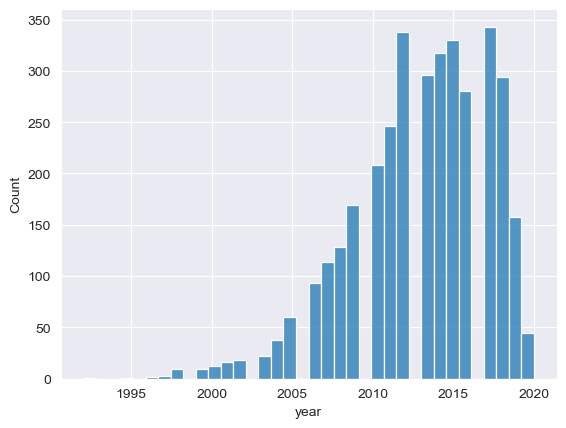

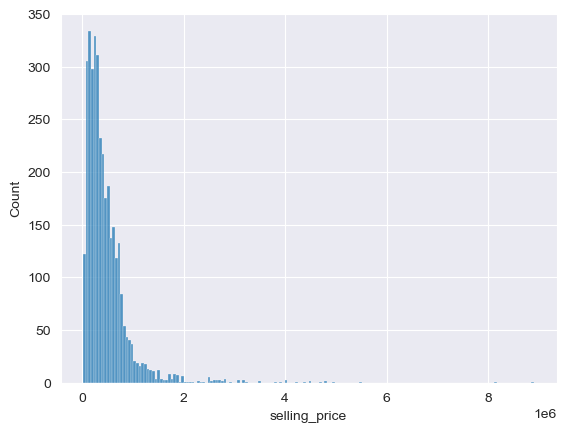

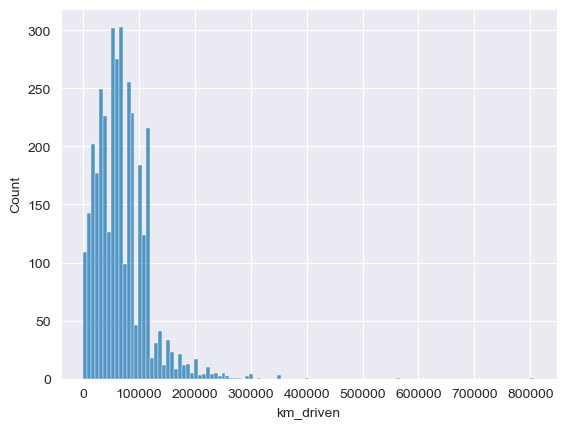

In [71]:
for i in df.select_dtypes(include='int').columns: # using histograme plot check distribution of numarical featires
    sns.set_style('darkgrid')
    sns.histplot(data=df,x=i)
    plt.show()

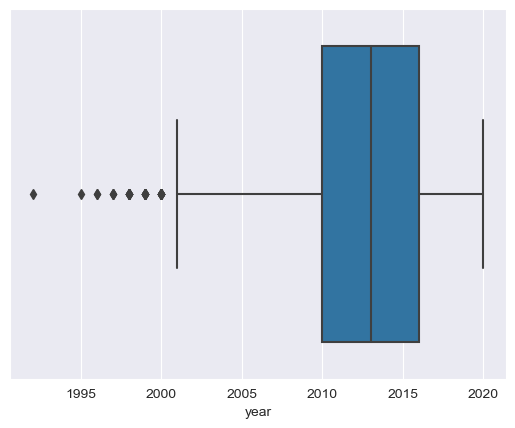

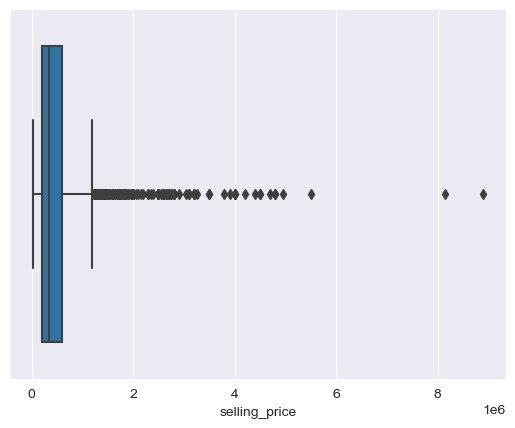

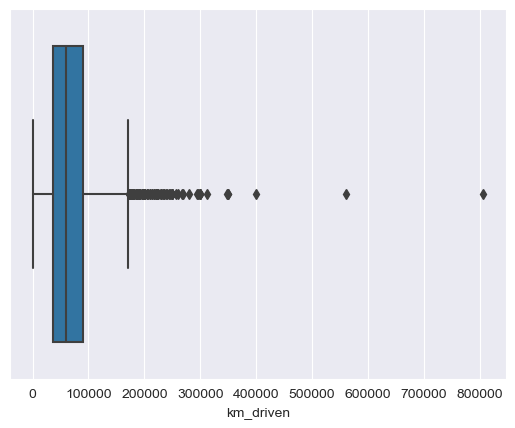

In [72]:
for i in df.select_dtypes(include='int').columns: # check outliers in our data
    sns.boxplot(data=df,x=i)
    sns.set_style('darkgrid')
    plt.show()

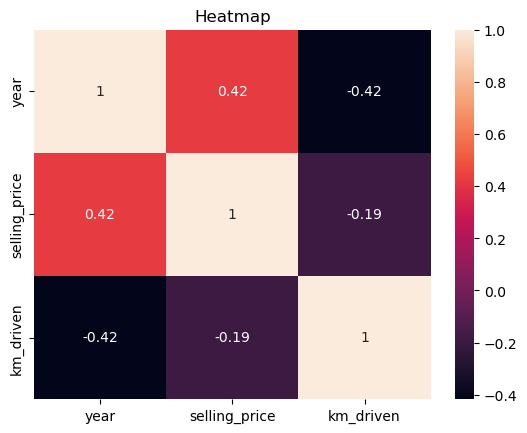

In [68]:
cor=df.select_dtypes(include='number').corr() # using heatmap check the co relation,relationshop b/w features
sns.heatmap(cor,annot=True)
plt.title('Heatmap')
plt.show()

C:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


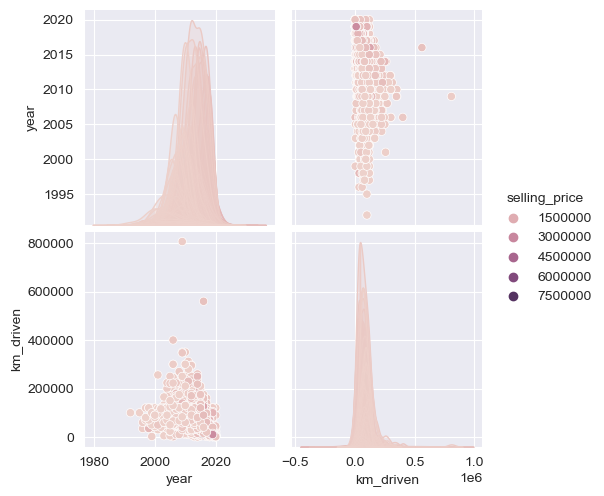

In [74]:
sns.pairplot(df,hue='selling_price') # pairplot is a seaborn library used for analyze pattrens

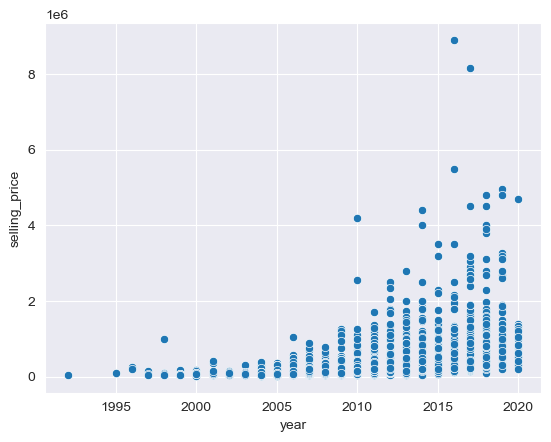

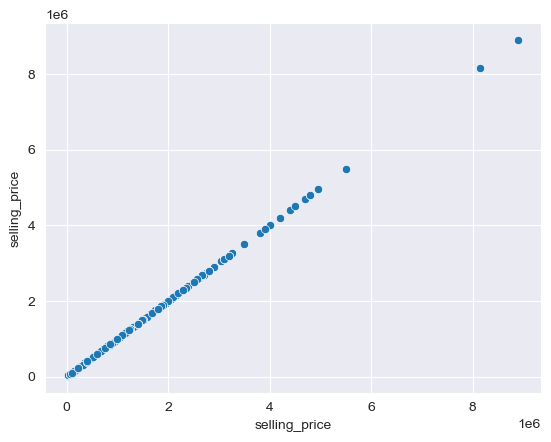

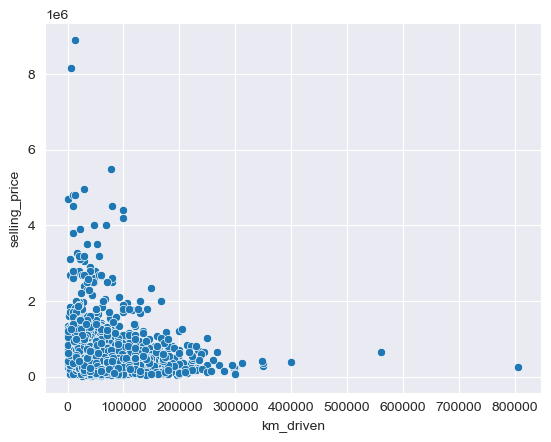

In [75]:
for i in df.select_dtypes(include='number').columns: # Scatter plot is used for check realtionship b/w features
    sns.scatterplot(data=df,x=i,y='selling_price')
    plt.show()

# visulize catagorcal features

In [77]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

<Axes: ylabel='count'>

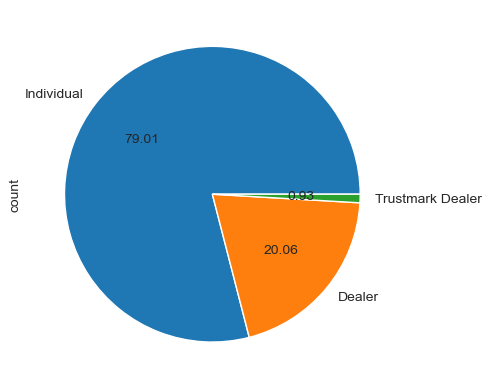

In [78]:
df['seller_type'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='count'>

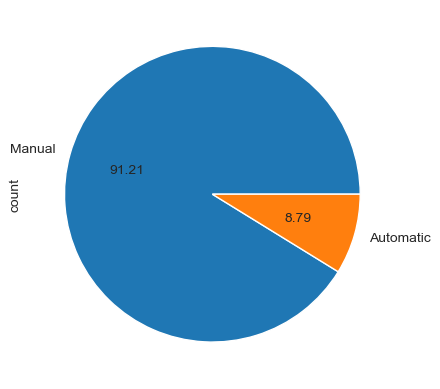

In [80]:
df['transmission'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='count'>

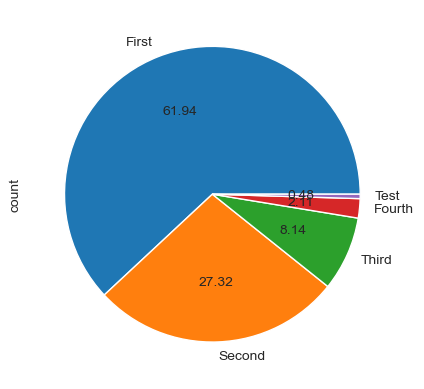

In [81]:
df['owner'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: ylabel='count'>

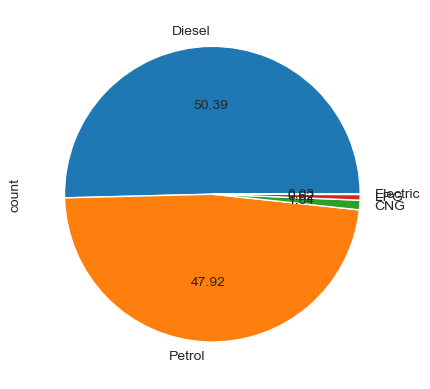

In [97]:
df['fuel'].value_counts().plot(kind='pie',autopct='%.2f')

In [82]:
df.select_dtypes(include='object').columns

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')

<Axes: xlabel='selling_price', ylabel='owner'>

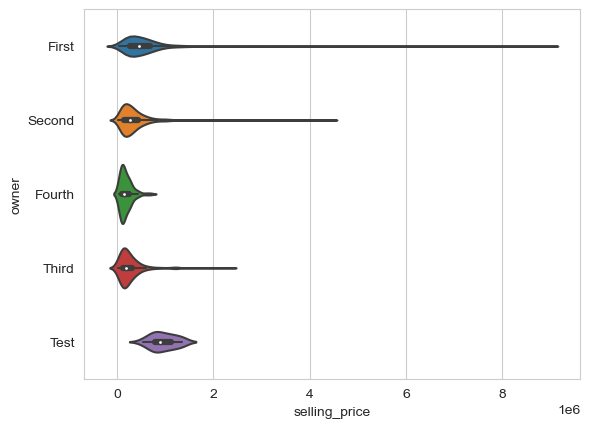

In [91]:
sns.set_style('whitegrid')
sns.violinplot(x='selling_price',y='owner',data=df)

<Axes: xlabel='selling_price', ylabel='transmission'>

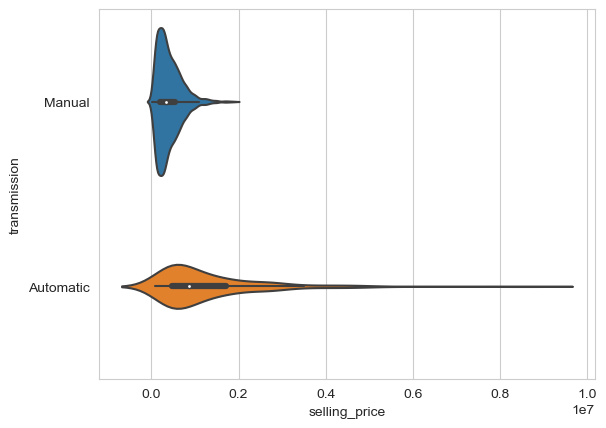

In [92]:
sns.violinplot(x='selling_price',y='transmission',data=df)

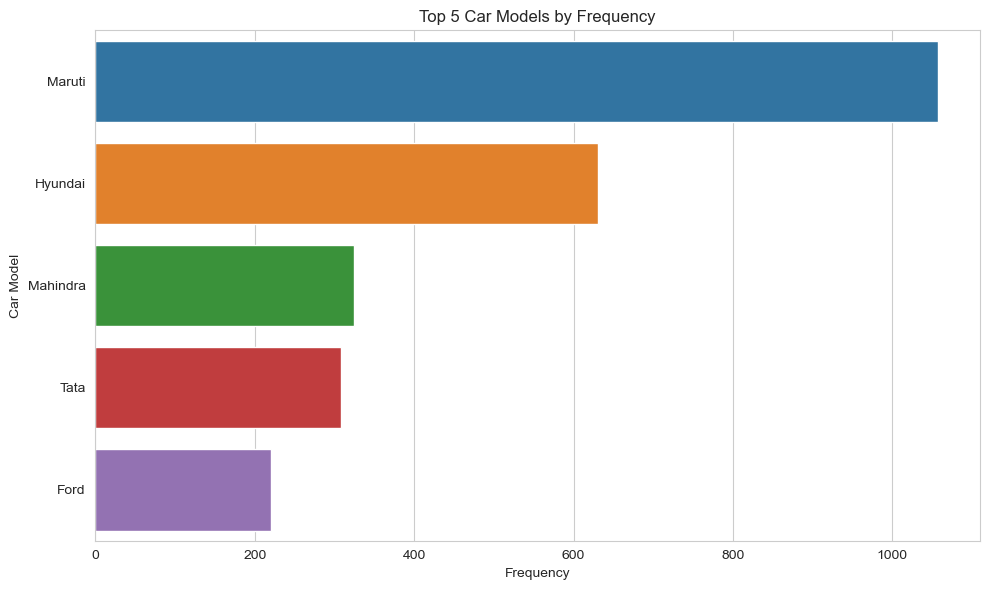

In [299]:
n = 5 # Number of top car models to plot
top_car_models = df['name'].value_counts().head(n)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

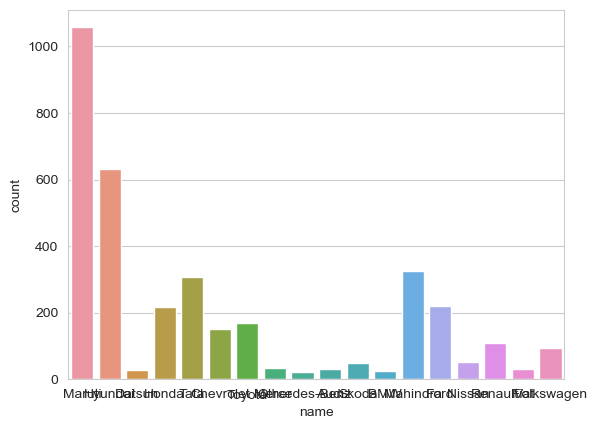

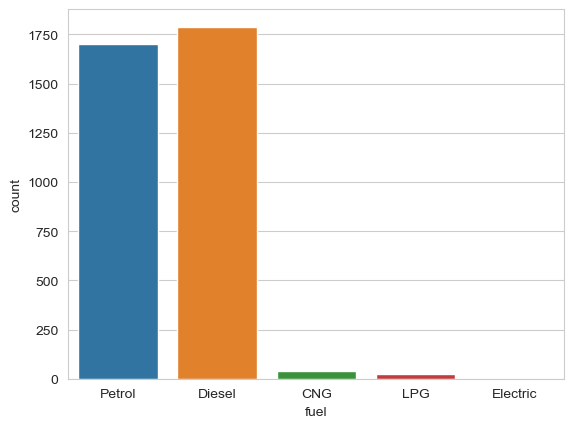

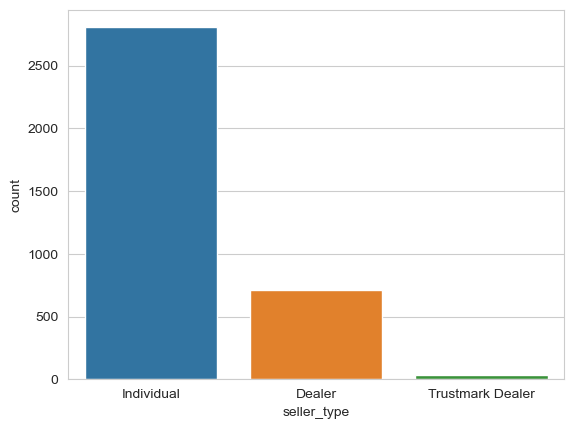

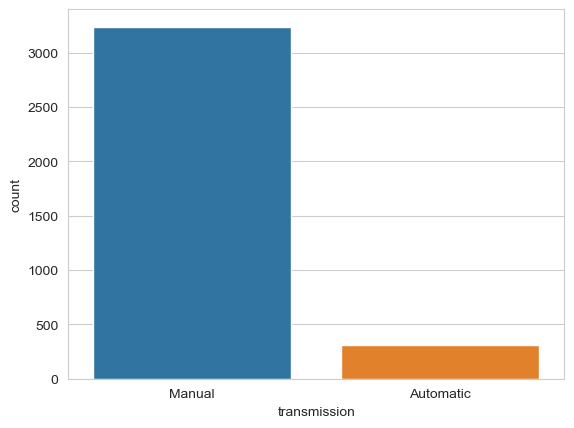

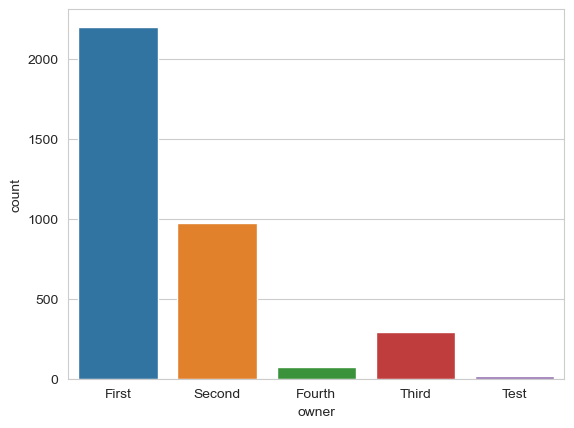

In [300]:
for i in df.select_dtypes(include='object').columns:
    sns.countplot(data=df,x=i)
    plt.show()

# Outlier detection

C:\Users\T L S\AppData\Local\Temp\ipykernel_18736\1705408248.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['year'])


<Axes: xlabel='year', ylabel='Density'>

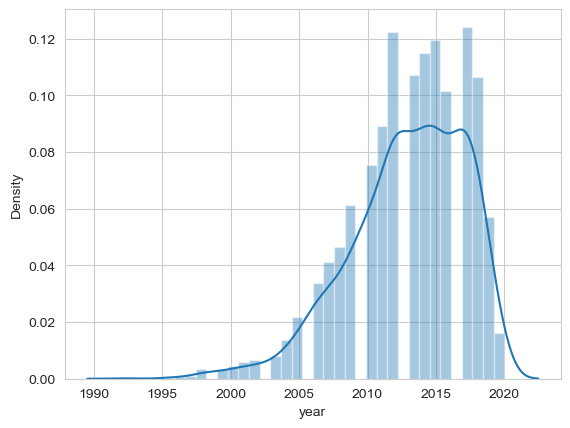

In [98]:
sns.distplot(df['year'])

In [99]:
q1=df['year'].quantile(0.25)
q3=df['year'].quantile(0.75)
iqr=q3-q1

In [100]:
iqr,q1,q3

(6.0, 2010.0, 2016.0)

In [101]:
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)

In [102]:
upper_limit,lower_limit

(2025.0, 2001.0)

In [103]:
df.loc[(df['year']>upper_limit)|(df['year']<lower_limit)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
48,Mahindra,1996,250000,35000,Diesel,Individual,Manual,Second
124,Maruti,1998,40000,40000,Petrol,Individual,Manual,Fourth
358,Maruti,2000,60000,40000,Petrol,Individual,Manual,Third
377,Hyundai,1999,50000,120000,Petrol,Individual,Manual,Second
556,Maruti,1995,95000,100000,Petrol,Individual,Manual,Second
770,Maruti,1999,85000,70000,Petrol,Individual,Manual,Second
985,Maruti,1999,60000,35000,Petrol,Individual,Manual,Second
1040,Maruti,2000,165000,60000,Petrol,Individual,Manual,Fourth
1250,Mahindra,2000,155000,50000,Diesel,Individual,Manual,Second
1257,Maruti,2000,50000,60000,Petrol,Individual,Manual,First


In [104]:
#capping becoz the value amount is high
df.loc[df['year']>=upper_limit,'year']=upper_limit
df.loc[df['year']<=lower_limit,'year']=lower_limit

<Axes: >

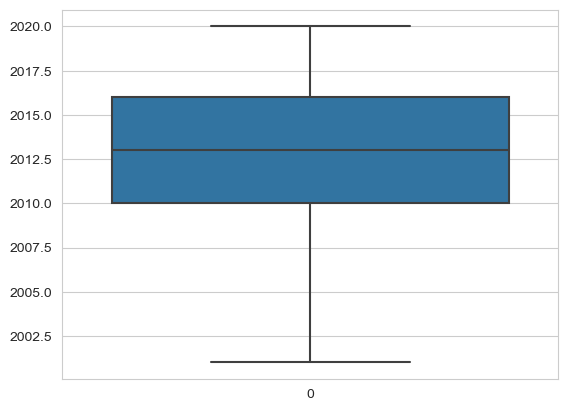

In [105]:
sns.boxplot(df['year'])

C:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


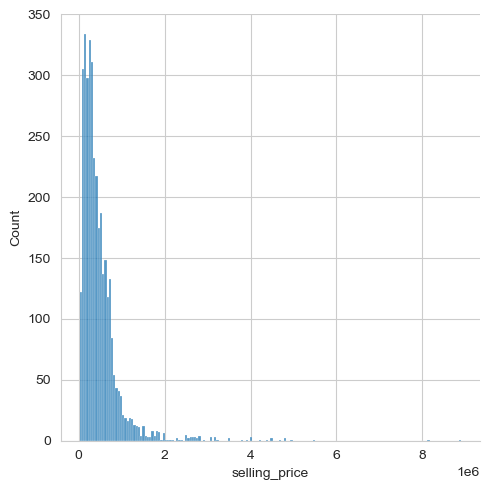

In [107]:
sns.displot(df['selling_price'])

In [108]:
q1=df['selling_price'].quantile(0.25)
q3=df['selling_price'].quantile(0.75)
iqr=q3-q1

In [109]:
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)

In [110]:
upper_limit,lower_limit

(1200000.0, -400000.0)

In [111]:
df.loc[(df['selling_price']>upper_limit)|(df['selling_price']<lower_limit)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
12,Toyota,2018,1650000,25000,Petrol,Dealer,Automatic,First
16,Other,2014,1964999,28000,Diesel,Dealer,Automatic,First
17,Mercedes-Benz,2013,1425000,59000,Diesel,Dealer,Automatic,First
22,Audi,2013,1735000,50000,Diesel,Dealer,Automatic,First
23,Mercedes-Benz,2012,1375000,33800,Diesel,Dealer,Automatic,Second
...,...,...,...,...,...,...,...,...
3463,Ford,2019,1250000,6590,Diesel,Dealer,Manual,First
3467,Ford,2016,1800000,126000,Diesel,Dealer,Automatic,First
3485,Toyota,2016,2500000,70000,Petrol,Individual,Automatic,Second
3489,Mahindra,2015,1225000,70000,Diesel,Individual,Manual,First


In [113]:
#capping
df.loc[df['selling_price']>=upper_limit,'selling_price']=upper_limit
df.loc[df['selling_price']<=lower_limit,'selling_price']=lower_limit

<Axes: >

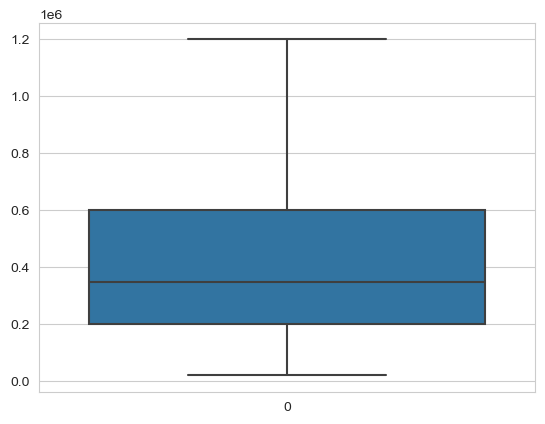

In [114]:
sns.boxplot(df['selling_price'])

C:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


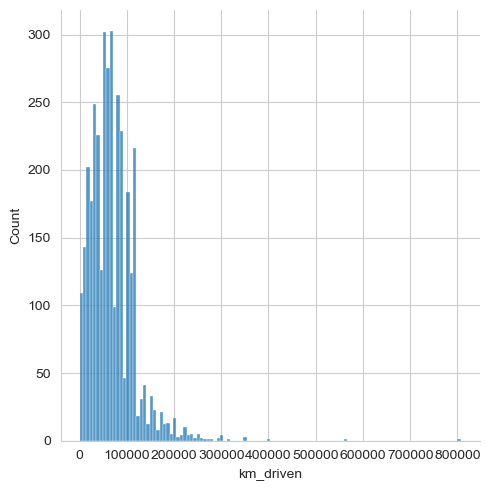

In [116]:
sns.displot(df['km_driven'])

In [117]:
q1=df['km_driven'].quantile(0.25)
q3=df['km_driven'].quantile(0.75)
iqr=q3-q1

In [118]:
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)

In [119]:
df.loc[(df['km_driven']>upper_limit)|(df['km_driven']<lower_limit)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
19,Audi,2011,1190000,175900,Diesel,Dealer,Automatic,First
56,Chevrolet,2010,280000,350000,Diesel,Individual,Manual,Second
57,Toyota,2011,350000,230000,Diesel,Individual,Manual,First
146,Chevrolet,2015,300000,175000,Diesel,Individual,Manual,First
184,Mahindra,2009,229999,230000,Diesel,Individual,Manual,Third
...,...,...,...,...,...,...,...,...
3471,Toyota,2001,150000,256000,Diesel,Dealer,Manual,First
3492,Toyota,2011,800000,230000,Diesel,Individual,Manual,First
3507,Mahindra,2014,650000,218000,Diesel,Individual,Manual,Second
3517,Fiat,2010,130000,210000,Diesel,Individual,Manual,Second


In [121]:
#capping
df.loc[df['km_driven']>=upper_limit,'km_driven']=upper_limit
df.loc[df['km_driven']<=lower_limit,'km_driven']=lower_limit

<Axes: >

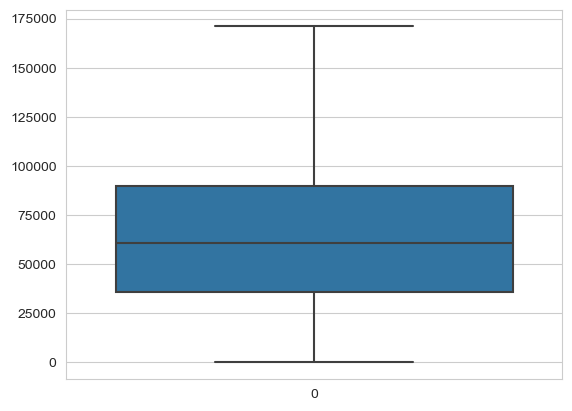

In [122]:
sns.boxplot(df['km_driven'])

In [127]:
df['Price']=df['selling_price']

In [129]:
df.drop(columns=['selling_price'],axis=1,inplace=True)

In [130]:
df.head()

,name,year,km_driven,fuel,seller_type,transmission,owner,Price
0,Maruti,2007,70000,Petrol,Individual,Manual,First,60000
1,Maruti,2007,50000,Petrol,Individual,Manual,First,135000
2,Hyundai,2012,100000,Diesel,Individual,Manual,First,600000
3,Datsun,2017,46000,Petrol,Individual,Manual,First,250000
4,Honda,2014,141000,Diesel,Individual,Manual,Second,450000


# Split data into X,y

In [141]:
X=df.iloc[:,:-1]

In [142]:
X


,name,year,km_driven,fuel,seller_type,transmission,owner
0,Maruti,2007,70000,Petrol,Individual,Manual,First
1,Maruti,2007,50000,Petrol,Individual,Manual,First
2,Hyundai,2012,100000,Diesel,Individual,Manual,First
3,Datsun,2017,46000,Petrol,Individual,Manual,First
4,Honda,2014,141000,Diesel,Individual,Manual,Second
...,...,...,...,...,...,...,...
3545,Toyota,2012,170000,Diesel,Individual,Manual,First
3546,Hyundai,2014,80000,Diesel,Individual,Manual,Second
3547,Maruti,2009,83000,Petrol,Individual,Manual,Second
3548,Hyundai,2016,90000,Diesel,Individual,Manual,First


In [145]:
y=df.iloc[:,-1]

In [146]:
y

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
3545    600000
3546    409999
3547    110000
3548    865000
3549    225000
Name: Price, Length: 3550, dtype: int64


# Data split into train and testing 

In [150]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=23)

In [151]:
X_train.shape

(2662, 7)

In [152]:
y_train.shape

(2662,)

In [153]:
X_test.shape

(888, 7)

In [154]:
y_test.shape

(888,)

In [156]:
df.select_dtypes(include='object').columns

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')

# Create a pipeline in which encode or scale data

In [164]:
ohe=make_column_transformer((OneHotEncoder(sparse=False),['name','fuel','seller_type','transmission','owner']),
                            remainder='passthrough')

In [165]:
scaler=MinMaxScaler()

In [168]:
lr=LinearRegression()

In [169]:
pip=make_pipeline(ohe,scaler,lr)

In [170]:
pip

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['name', 'fuel',
                                                   'seller_type',
                                                   'transmission',
                                                   'owner'])])),
                ('minmaxscaler', MinMaxScaler()),
                ('linearregression', LinearRegression())])

# Model traning

In [171]:
pip.fit(X_train,y_train)

C:\anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['name', 'fuel',
                                                   'seller_type',
                                                   'transmission',
                                                   'owner'])])),
                ('minmaxscaler', MinMaxScaler()),
                ('linearregression', LinearRegression())])

# Model evaluate

In [172]:
y_predR=pip.predict(X_test)

In [184]:
cross_val=cross_val_score(pip,X_train,y_train,cv=5)

C:\anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call

# check error how model perform

In [185]:
mse=mean_squared_error(y_test,y_predR)
mae=mean_absolute_error(y_test,y_predR)
rmse=np.sqrt(mse)

In [186]:
print('mse',mse)
print('mae',mae)
print('rmse',rmse)

mse 27137393682.0
mae 125810.73423423423
rmse 164734.3124003011


In [187]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_predR)
print(score)

0.6660699208630505


In [188]:
cross_val

array([0.69871047, 0.72712449,        nan, 0.71304769, 0.69206736])

# check error using graph

C:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


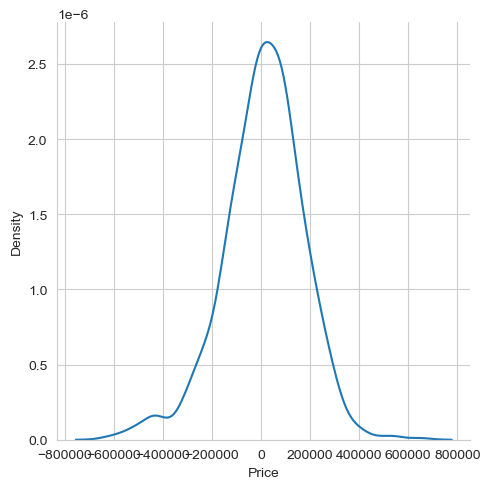

In [278]:
sns.displot(y_predR-y_test,kind='kde')
plt.show()

In [177]:
ridge=Ridge()
pip=make_pipeline(ohe,scaler,ridge)

In [178]:
pip.fit(X_train,y_train)

C:\anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['name', 'fuel',
                                                   'seller_type',
                                                   'transmission',
                                                   'owner'])])),
                ('minmaxscaler', MinMaxScaler()), ('ridge', Ridge())])

In [179]:
y_pred_r=pip.predict(X_test)

In [180]:
mse=mean_squared_error(y_test,y_pred_r)
mae=mean_absolute_error(y_test,y_pred_r)
rmse=np.sqrt(mse)

In [181]:
print('mse',mse)
print('mae',mae)
print('rmse',rmse)

mse 27105258672.322765
mae 125747.82689010573
rmse 164636.74763649446


In [183]:
score_r=r2_score(y_pred_r,y_test)
print(score_r)

0.5534754769168112


In [189]:
lasso=Lasso()

In [190]:
pip=make_pipeline(ohe,scaler,lasso)

In [191]:
pip.fit(X_train,y_train)

C:\anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.647e+12, tolerance: 2.505e+10
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['name', 'fuel',
                                                   'seller_type',
                                                   'transmission',
                                                   'owner'])])),
                ('minmaxscaler', MinMaxScaler()), ('lasso', Lasso())])

In [192]:
y_pred_l=pip.predict(X_test)

In [193]:
mse=mean_squared_error(y_test,y_pred_l)
mae=mean_absolute_error(y_test,y_pred_l)
rmse=np.sqrt(mse)

In [194]:
print('mse',mse)
print('mae',mae)
print('rmse',rmse)

mse 27139180454.48141
mae 125740.47593753556
rmse 164739.73550568003


In [195]:
score_l=r2_score(y_pred_l,y_test)
print(score_l)

0.5593354275844545


In [235]:
svm=SVR(kernel='poly',degree=3)
pip=make_pipeline(ohe,scaler,svm)

In [236]:
pip

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['name', 'fuel',
                                                   'seller_type',
                                                   'transmission',
                                                   'owner'])])),
                ('minmaxscaler', MinMaxScaler()), ('svr', SVR(kernel='poly'))])

In [237]:
pip.fit(X_train,y_train)

C:\anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['name', 'fuel',
                                                   'seller_type',
                                                   'transmission',
                                                   'owner'])])),
                ('minmaxscaler', MinMaxScaler()), ('svr', SVR(kernel='poly'))])

In [238]:
y_predS=pip.predict(X_test)

In [239]:
mse=mean_squared_error(y_test,y_predS)
mae=mean_absolute_error(y_test,y_predS)
rmse=np.sqrt(mse)

In [240]:
print("mse",mse)
print("mae",mae)
print('rmse',rmse)

mse 84804142918.41997
mae 218126.47222241163
rmse 291211.50890447304


In [241]:
score_svm=r2_score(y_predS,y_test)
print(score_svm)

-2146171.1777508366


In [242]:
tree=DecisionTreeRegressor()
pip=make_pipeline(ohe,scaler,tree)

In [243]:
pip.fit(X_train,y_train)

C:\anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['name', 'fuel',
                                                   'seller_type',
                                                   'transmission',
                                                   'owner'])])),
                ('minmaxscaler', MinMaxScaler()),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [244]:
y_predT=pip.predict(X_test)

In [246]:
mse=mean_squared_error(y_test,y_predT)
mae=mean_absolute_error(y_test,y_predT)
rmse=np.sqrt(mse)

In [247]:
print("mse",mse)
print("mae",mae)
print('rmse',rmse)

mse 44465817800.2232
mae 141820.8334271772
rmse 210869.19594910776


In [248]:
score_t=r2_score(y_predT,y_test)
print(score_t)

0.4917310958329828


In [261]:
from xgboost import XGBRegressor

In [257]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/70/58/2f94976df39470fb00eec2cb4f914dde44cd0df8d96483208bf7db4bc97e/xgboost-2.1.3-py3-none-win_amd64.whl.metadata
Using cached xgboost-2.1.3-py3-none-win_amd64.whl (124.9 MB)


In [262]:
xgb=XGBRegressor()
pip=make_pipeline(ohe,scaler,xgb)

In [263]:
pip.fit(X_train,y_train)

C:\anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['name', 'fuel',
                                                   'seller_type',
                                                   'transmission',
                                                   'owner'])])),
                ('minmaxscaler', MinMaxScaler()),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsa...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [264]:
y_predXG=pip.predict(X_test)

In [266]:
mse=mean_squared_error(y_test,y_predXG)
mae=mean_absolute_error(y_test,y_predXG)
rmse=np.sqrt(mse)

In [267]:
print("mse",mse)
print("mae",mae)
print('rmse',rmse)

mse 26427185984.863453
mae 114825.85595043286
rmse 162564.4056516169


In [268]:
scoreXG=r2_score(y_predXG,y_test)
print(scoreXG)

0.6012248058583536


In [271]:
rf=RandomForestRegressor()
pip=make_pipeline(ohe,scaler,rf)

In [272]:
pip.fit(X_train,y_train)

C:\anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['name', 'fuel',
                                                   'seller_type',
                                                   'transmission',
                                                   'owner'])])),
                ('minmaxscaler', MinMaxScaler()),
                ('randomforestregressor', RandomForestRegressor())])

In [273]:
y_predrf=pip.predict(X_test)

In [274]:
mse=mean_squared_error(y_test,y_predrf)
mae=mean_absolute_error(y_test,y_predrf)
rmse=np.sqrt(mse)

In [275]:
c

mse 26148134249.65718
mae 114512.19748519358
rmse 161703.84735576695


In [286]:
score_rf=r2_score(y_predrf,y_test)
print(score_rf)

0.594339875974601


In [290]:
knn=KNeighborsRegressor()
pip=make_pipeline(ohe,scaler,knn)

In [291]:
pip.fit(X_train,y_train)

C:\anaconda\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['name', 'fuel',
                                                   'seller_type',
                                                   'transmission',
                                                   'owner'])])),
                ('minmaxscaler', MinMaxScaler()),
                ('kneighborsregressor', KNeighborsRegressor())])

In [292]:
y_predK=pip.predict(X_test)

In [293]:
mse=mean_squared_error(y_test,y_predK)
mae=mean_absolute_error(y_test,y_predK)
rmse=np.sqrt(mse)

In [294]:
print("mse",mse)
print("mae",mae)
print('rmse',rmse)

mse 28357421665.00924
mae 117492.10067567568
rmse 168396.6201115962


In [295]:
score_k=r2_score(y_predK,y_test)
print(score_k)

0.5091355419653651


# Conclusion
our model give almost best which is linear Regression give the best but also we can add more data and also apply Gridsearchcv and randomizedCV we can achive more best results